<a href="https://colab.research.google.com/github/Revanth810/AI4CCEE_Fall_2024/blob/main/in_class_activity/lecture6/submissions/Revanth_Lecture6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lecture 6

## Activity 1

1.	Go to Google Colab and create a new notebook.
2.	Install PySpark.
3.	Create Spark Session.

In [ ]:
!pip install pyspark

In [ ]:
from pyspark.sql import SparkSession

# Create Spark session
spark = SparkSession.builder \
    .appName("Colab PySpark Session") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()

# Test the Spark session
spark

# Print Spark version to confirm installation
print(f"Spark Version: {spark.version}")

Spark Version: 3.5.3


4.	Upload wejo.json and load it into rdd.
5.	Inspect first few rows.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import requests

url = 'https://drive.google.com/uc?export=download&id=14ZiwJNE7ZWy71JZdb4uLL5f_-F_zeArp'
output = 'wejo.json'

# Download the file
response = requests.get(url)
with open(output, 'wb') as file:
    file.write(response.content)

print("File downloaded successfully!")


Mounted at /content/drive
File downloaded successfully!


In [ ]:
from pyspark.sql import SparkSession

# Create Spark session
spark = SparkSession.builder \
    .appName("Load JSON into RDD") \
    .getOrCreate()

# Load JSON file into an RDD
rdd = spark.sparkContext.textFile('/content/wejo.json')

# Inspect the first few rows
print("First 5 rows of the RDD:")
for row in rdd.take(5):
    print(row)


First 5 rows of the RDD:
{"dataPointId":"02d77c7e-1ac8-45bc-978f-7c3855f5ff9b","journeyId":"2fe4fae05dd1198d1995d8f9e34d69a5ca1cc8bc","capturedTimestamp":"2023-04-12T19:00:04.000-0500","location":{"latitude":42.497317,"longitude":-90.740595,"geohash":"9zx3z0","postalCode":"52002","regionCode":"IA","countryCode":"US"},"metrics":{"speed":38.01,"heading":359.0},"vehicle":{"wejoVehicleTypeId":8905611058720503136,"status":{"ignitionStatus":"MID_JOURNEY"}}}
{"dataPointId":"03fde858-5922-446a-b68a-00167b866c6e","journeyId":"1183a6bfb3178ba00a4a8585aca72db2d4e689ad","capturedTimestamp":"2023-04-12T19:00:21.000-0500","location":{"latitude":41.658504,"longitude":-93.500216,"geohash":"9zmsbr","postalCode":"50009","regionCode":"IA","countryCode":"US"},"metrics":{"speed":41.47,"heading":90.0},"vehicle":{"wejoVehicleTypeId":-5486746399762838414,"status":{"ignitionStatus":"MID_JOURNEY"}}}
{"dataPointId":"04ce2a2c-d0fd-4197-9416-9324c9a5106c","journeyId":"1c96529d9ccf86042ca98744b3f3b710c247b67d","cap

6.	Parse JSON Strings into Python Dictionaries.

In [ ]:
import json

# Parse JSON strings into Python dictionaries
parsed_rdd = rdd.map(lambda row: json.loads(row))

# Inspect the first few parsed dictionaries
print("First 5 parsed dictionaries:")
for row in parsed_rdd.take(5):
    print(row)

First 5 parsed dictionaries:
{'dataPointId': '02d77c7e-1ac8-45bc-978f-7c3855f5ff9b', 'journeyId': '2fe4fae05dd1198d1995d8f9e34d69a5ca1cc8bc', 'capturedTimestamp': '2023-04-12T19:00:04.000-0500', 'location': {'latitude': 42.497317, 'longitude': -90.740595, 'geohash': '9zx3z0', 'postalCode': '52002', 'regionCode': 'IA', 'countryCode': 'US'}, 'metrics': {'speed': 38.01, 'heading': 359.0}, 'vehicle': {'wejoVehicleTypeId': 8905611058720503136, 'status': {'ignitionStatus': 'MID_JOURNEY'}}}
{'dataPointId': '03fde858-5922-446a-b68a-00167b866c6e', 'journeyId': '1183a6bfb3178ba00a4a8585aca72db2d4e689ad', 'capturedTimestamp': '2023-04-12T19:00:21.000-0500', 'location': {'latitude': 41.658504, 'longitude': -93.500216, 'geohash': '9zmsbr', 'postalCode': '50009', 'regionCode': 'IA', 'countryCode': 'US'}, 'metrics': {'speed': 41.47, 'heading': 90.0}, 'vehicle': {'wejoVehicleTypeId': -5486746399762838414, 'status': {'ignitionStatus': 'MID_JOURNEY'}}}
{'dataPointId': '04ce2a2c-d0fd-4197-9416-9324c9a510

7.	Extract Key Information (latitude, longitude, speed).


In [ ]:
# Extract latitude, longitude, and speed from each data point
extracted_rdd = parsed_rdd.map(
    lambda row: (row['location']['latitude'],
                 row['location']['longitude'],
                 row['metrics']['speed'])
)

# Inspect the first few extracted rows
print("First 5 extracted rows (latitude, longitude, speed):")
for row in extracted_rdd.take(5):
    print(row)


First 5 extracted rows (latitude, longitude, speed):
(42.497317, -90.740595, 38.01)
(41.658504, -93.500216, 41.47)
(41.515211, -94.232996, 36.86)
(42.502249, -96.410195, 14.97)
(41.5958361, -93.73612159999999, 0.0)


8.	Filter Data Points with Speed > 30 mph.


In [ ]:
# Filter data points where speed > 30 mph
filtered_rdd = extracted_rdd.filter(lambda x: x[2] > 30)

# Inspect the filtered rows
print("First 5 filtered rows (latitude, longitude, speed):")
for row in filtered_rdd.take(5):
    print(row)


First 5 filtered rows (latitude, longitude, speed):
(42.497317, -90.740595, 38.01)
(41.658504, -93.500216, 41.47)
(41.515211, -94.232996, 36.86)
(42.0185, -93.62851, 64.51)
(41.555452, -93.633866, 55.29)


9.	Count the Number of Data Points with Speed > 30 mph.


In [ ]:
# Count the number of data points with speed > 30 mph
count_high_speed = filtered_rdd.count()
print(f"Number of data points with speed > 30 mph: {count_high_speed}")


Number of data points with speed > 30 mph: 2395


10.	Collect and Display Filtered Data Points.

In [ ]:
# Collect filtered data points into a list
filtered_data = filtered_rdd.collect()

# Display the filtered data points
print("Filtered data points (latitude, longitude, speed):")
for row in filtered_data[:5]:  # Display the first 5 rows
    print(row)


Filtered data points (latitude, longitude, speed):
(42.497317, -90.740595, 38.01)
(41.658504, -93.500216, 41.47)
(41.515211, -94.232996, 36.86)
(42.0185, -93.62851, 64.51)
(41.555452, -93.633866, 55.29)


11.	Plot the filtered data using matplotlib.

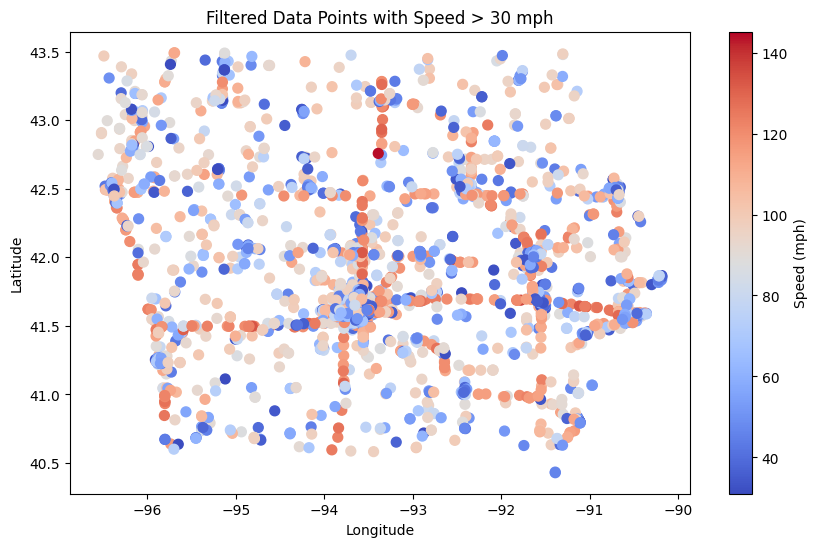

In [ ]:
import matplotlib.pyplot as plt

# Prepare latitude, longitude, and speed for plotting
latitudes = [x[0] for x in filtered_data]
longitudes = [x[1] for x in filtered_data]
speeds = [x[2] for x in filtered_data]

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(longitudes, latitudes, c=speeds, cmap='coolwarm', s=50)
plt.colorbar(label='Speed (mph)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Filtered Data Points with Speed > 30 mph')
plt.show()


12.	What is the purpose of RDD transformations and actions?

RDD (Resilient Distributed Dataset) transformations and actions are core operations in Apache Spark that enable distributed data processing. **Transformations** (like `map()`, `filter()`, and `flatMap()`) are lazy operations that define how data should be processed, creating a new RDD from an existing one without immediately executing the computation. These operations are only executed when an **action** (like `count()`, `collect()`, or `take()`) is called, which triggers Spark to compute and return results to the driver program. This separation allows Spark to optimize execution plans through lineage tracking, fault tolerance, and lazy evaluation, ensuring efficient, distributed data processing.

13.	How would you modify the code to filter by different latitude or heading?

Filtering the data for latitude > 41.5 and heading between 0 and 180 degrees is as below.

In [ ]:
# Filter data points by latitude > 41.5 and heading between 0 and 180 degrees
filtered_rdd_by_lat_heading = parsed_rdd.filter(
    lambda row: row['location']['latitude'] > 41.5 and
                0 <= row['metrics']['heading'] <= 180
)

# Extract the relevant data (latitude, longitude, speed)
filtered_data = filtered_rdd_by_lat_heading.map(
    lambda row: (row['location']['latitude'],
                 row['location']['longitude'],
                 row['metrics']['speed'],
                 row['metrics']['heading'])
)

# Inspect the first few filtered rows
print("First 5 filtered rows (latitude, longitude, speed, heading):")
for row in filtered_data.take(5):
    print(row)

First 5 filtered rows (latitude, longitude, speed, heading):
(41.658504, -93.500216, 41.47, 90.0)
(41.515211, -94.232996, 36.86, 0.0)
(42.164799, -93.392375, 16.12, 4.0)
(42.0185, -93.62851, 64.51, 34.0)
(41.776962, -93.718941, 0.0, 88.0)


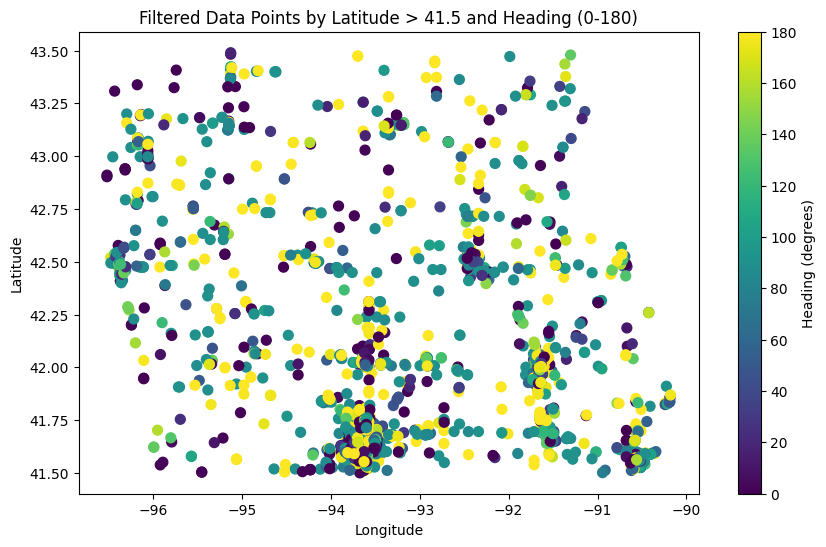

In [ ]:
# Collect the filtered data into a list
filtered_list = filtered_data.collect()

# Prepare latitude, longitude, and heading for plotting
latitudes = [x[0] for x in filtered_list]
longitudes = [x[1] for x in filtered_list]
headings = [x[3] for x in filtered_list]  # Use heading as the color

# Scatter plot with heading as the color scale
plt.figure(figsize=(10, 6))
plt.scatter(longitudes, latitudes, c=headings, cmap='viridis', s=50)
plt.colorbar(label='Heading (degrees)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Filtered Data Points by Latitude > 41.5 and Heading (0-180)')
plt.show()

## Activity 2

1.	Upload the CSV file to Colab : apple_stock.csv.

In [ ]:
import pandas as pd
import requests

# Define the URL of the file
url = 'https://drive.google.com/uc?export=download&id=14aM7v4fBbxLBv0iGQo-DNYUo22SL1TXB'

# Download the CSV file
response = requests.get(url)
open('data.csv', 'wb').write(response.content)

# Read the downloaded CSV into a DataFrame
df = pd.read_csv('data.csv')

# Display the first few rows
print("First 5 rows of the DataFrame:")
print(df.head())


First 5 rows of the DataFrame:
         Date        Open        High         Low       Close     Volume  \
0  2010-01-04  213.429998  214.499996  212.380001  214.009998  123432400   
1  2010-01-05  214.599998  215.589994  213.249994  214.379993  150476200   
2  2010-01-06  214.379993  215.230000  210.750004  210.969995  138040000   
3  2010-01-07  211.750000  212.000006  209.050005  210.580000  119282800   
4  2010-01-08  210.299994  212.000006  209.060005  211.980005  111902700   

   Adj Close  
0  27.727039  
1  27.774976  
2  27.333178  
3  27.282650  
4  27.464034  


2.	Load the CSV File into PySpark and Show the first 20 rows of the DataFrame
3.	Print the schema of the DataFrame
4.	 Get the number of rows in the DataFrame

In [ ]:
!pip install pyspark

In [ ]:
##### Initialize Spark Session #######
from pyspark.sql import SparkSession

# Create Spark session
spark = SparkSession.builder \
    .appName("CSV to PySpark DataFrame") \
    .getOrCreate()

####### Load the CSV file into Spark Dataframe and print 20 rows #######
# Load the CSV file into a PySpark DataFrame
spark_df = spark.read.csv('data.csv', header=True, inferSchema=True)

# Show the first 20 rows of the DataFrame
print("First 20 rows of the DataFrame:")
spark_df.show(20)


First 20 rows of the DataFrame:
+----------+------------------+------------------+------------------+------------------+---------+------------------+
|      Date|              Open|              High|               Low|             Close|   Volume|         Adj Close|
+----------+------------------+------------------+------------------+------------------+---------+------------------+
|2010-01-04|        213.429998|        214.499996|212.38000099999996|        214.009998|123432400|         27.727039|
|2010-01-05|        214.599998|        215.589994|        213.249994|        214.379993|150476200|27.774976000000002|
|2010-01-06|        214.379993|            215.23|        210.750004|        210.969995|138040000|27.333178000000004|
|2010-01-07|            211.75|        212.000006|        209.050005|            210.58|119282800|          27.28265|
|2010-01-08|        210.299994|        212.000006|209.06000500000002|211.98000499999998|111902700|         27.464034|
|2010-01-11|212.79999700

In [ ]:
### Print Schema of the Dataframe####
print("Schema of the DataFrame:")
spark_df.printSchema()


Schema of the DataFrame:
root
 |-- Date: date (nullable = true)
 |-- Open: double (nullable = true)
 |-- High: double (nullable = true)
 |-- Low: double (nullable = true)
 |-- Close: double (nullable = true)
 |-- Volume: integer (nullable = true)
 |-- Adj Close: double (nullable = true)



In [ ]:
# Get the number of rows in the DataFrame
num_rows = spark_df.count()
print(f"Number of rows in the DataFrame: {num_rows}")

Number of rows in the DataFrame: 1762


5.	Perform some basic descriptive statistics

In [ ]:
# Perform basic descriptive statistics
print("Basic Descriptive Statistics:")
spark_df.describe().show()

Basic Descriptive Statistics:
+-------+------------------+------------------+------------------+-----------------+-------------------+------------------+
|summary|              Open|              High|               Low|            Close|             Volume|         Adj Close|
+-------+------------------+------------------+------------------+-----------------+-------------------+------------------+
|  count|              1762|              1762|              1762|             1762|               1762|              1762|
|   mean| 313.0763111589103| 315.9112880164581| 309.8282405079457|312.9270656379113|9.422577587968218E7| 75.00174115607275|
| stddev|185.29946803981522|186.89817686485767|183.38391664371008|185.1471036170943|6.020518776592709E7| 28.57492972179906|
|    min|              90.0|         90.699997|         89.470001|        90.279999|           11475900|         24.881912|
|    max|        702.409988|        705.070023|        699.569977|       702.100021|          47024950

In [ ]:
from pyspark.sql.functions import mean, min, max, stddev

# Compute specific statistics for the 'Open' column
stats_df = spark_df.select(
    mean("Open").alias("Mean_Open"),
    min("Open").alias("Min_Open"),
    max("Open").alias("Max_Open"),
    stddev("Open").alias("StdDev_Open")
)

print("Specific Statistics for 'Open' Column:")
stats_df.show()

Specific Statistics for 'Open' Column:
+-----------------+--------+----------+------------------+
|        Mean_Open|Min_Open|  Max_Open|       StdDev_Open|
+-----------------+--------+----------+------------------+
|313.0763111589103|    90.0|702.409988|185.29946803981522|
+-----------------+--------+----------+------------------+



In [ ]:
from pyspark.sql.functions import year

# Add a 'Year' column extracted from the 'Date' column
spark_df = spark_df.withColumn("Year", year("Date"))

# Group by 'Year' and compute average 'Open' price for each year
grouped_stats = spark_df.groupBy("Year").mean("Open").orderBy("Year")
print("Average 'Open' Price by Year:")
grouped_stats.show()

Average 'Open' Price by Year:
+----+------------------+
|Year|         avg(Open)|
+----+------------------+
|2010| 259.9576190992064|
|2011|364.06142773412705|
|2012|     576.652720788|
|2013| 473.1281355634922|
|2014| 295.1426195357143|
|2015|120.17575393253965|
|2016|104.50777772619044|
+----+------------------+



6.	Select Key columns : ("Date", "Open", "Close", "Volume").
7.	Calculate Daily Price Change.
8.	Calculate Average Daily Volume.
9.	Find Maximum and Minimum Closing Prices.
10.	Plot the daily price trends.

In [ ]:
# Select key columns
key_columns_df = spark_df.select("Date", "Open", "Close", "Volume")

# Show the first few rows
print("Selected Key Columns:")
key_columns_df.show(5)


Selected Key Columns:
+----------+----------+------------------+---------+
|      Date|      Open|             Close|   Volume|
+----------+----------+------------------+---------+
|2010-01-04|213.429998|        214.009998|123432400|
|2010-01-05|214.599998|        214.379993|150476200|
|2010-01-06|214.379993|        210.969995|138040000|
|2010-01-07|    211.75|            210.58|119282800|
|2010-01-08|210.299994|211.98000499999998|111902700|
+----------+----------+------------------+---------+
only showing top 5 rows



In [ ]:
from pyspark.sql.functions import (col,
                                   expr)

# Calculate the daily price change and add it as a new column
price_change_df = key_columns_df.withColumn(
    "Daily_Price_Change", expr("Close - Open")
)

print("DataFrame with Daily Price Change:")
price_change_df.show(5)


DataFrame with Daily Price Change:
+----------+----------+------------------+---------+--------------------+
|      Date|      Open|             Close|   Volume|  Daily_Price_Change|
+----------+----------+------------------+---------+--------------------+
|2010-01-04|213.429998|        214.009998|123432400|  0.5799999999999841|
|2010-01-05|214.599998|        214.379993|150476200|-0.22000499999998624|
|2010-01-06|214.379993|        210.969995|138040000| -3.4099980000000016|
|2010-01-07|    211.75|            210.58|119282800| -1.1699999999999875|
|2010-01-08|210.299994|211.98000499999998|111902700|   1.680010999999979|
+----------+----------+------------------+---------+--------------------+
only showing top 5 rows



In [ ]:
from pyspark.sql.functions import mean

# Calculate the average daily volume
avg_volume = price_change_df.agg(mean("Volume").alias("Average_Daily_Volume")).collect()[0][0]

print(f"Average Daily Volume: {avg_volume}")


Average Daily Volume: 94225775.87968218


In [ ]:
from pyspark.sql.functions import max, min

# Calculate the maximum and minimum closing prices
closing_stats = spark_df.agg(
    max("Close").alias("Max_Closing_Price"),
    min("Close").alias("Min_Closing_Price")
).collect()[0]

print(f"Max Closing Price: {closing_stats['Max_Closing_Price']}")
print(f"Min Closing Price: {closing_stats['Min_Closing_Price']}")


Max Closing Price: 702.100021
Min Closing Price: 90.279999


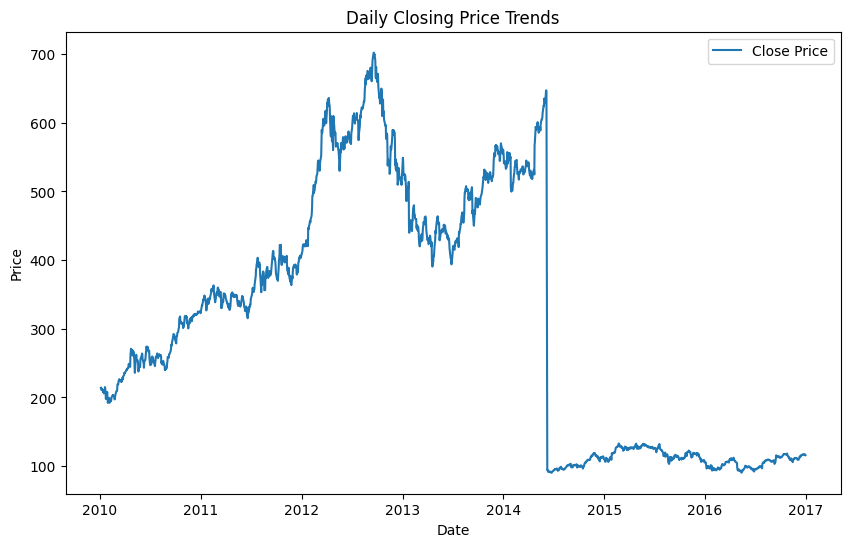

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Collect the Date and Close columns for plotting
pandas_df = price_change_df.select("Date", "Close").toPandas()

# Convert the Date column to datetime format
pandas_df['Date'] = pd.to_datetime(pandas_df['Date'])

# Plot the daily closing prices
plt.figure(figsize=(10, 6))
plt.plot(pandas_df['Date'], pandas_df['Close'], label='Close Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Daily Closing Price Trends')
plt.legend()
plt.show()


11.	How would you modify the code to filter data for specific months or years?

The modified code to filter data for specific month or year is as below.

In [ ]:
#Extract Year and Month from the "Date" Column
from pyspark.sql.functions import year, month

# Add 'Year' and 'Month' columns to the DataFrame
df_with_date_info = spark_df.withColumn("Year", year("Date")).withColumn("Month", month("Date"))

# Show the updated DataFrame with Year and Month columns
df_with_date_info.show(5)

+----------+----------+----------+------------------+------------------+---------+------------------+----+-----+
|      Date|      Open|      High|               Low|             Close|   Volume|         Adj Close|Year|Month|
+----------+----------+----------+------------------+------------------+---------+------------------+----+-----+
|2010-01-04|213.429998|214.499996|212.38000099999996|        214.009998|123432400|         27.727039|2010|    1|
|2010-01-05|214.599998|215.589994|        213.249994|        214.379993|150476200|27.774976000000002|2010|    1|
|2010-01-06|214.379993|    215.23|        210.750004|        210.969995|138040000|27.333178000000004|2010|    1|
|2010-01-07|    211.75|212.000006|        209.050005|            210.58|119282800|          27.28265|2010|    1|
|2010-01-08|210.299994|212.000006|209.06000500000002|211.98000499999998|111902700|         27.464034|2010|    1|
+----------+----------+----------+------------------+------------------+---------+--------------

Filter Data by Specific Year (Say 2015)

In [ ]:

# Filter the DataFrame for the year 2015
filtered_by_year = df_with_date_info.filter(df_with_date_info.Year == 2015)

print("Filtered Data for the Year 2015:")
filtered_by_year.show(5)


Filtered Data for the Year 2015:
+----------+----------+----------+----------+------------------+--------+------------------+----+-----+
|      Date|      Open|      High|       Low|             Close|  Volume|         Adj Close|Year|Month|
+----------+----------+----------+----------+------------------+--------+------------------+----+-----+
|2015-01-02|111.389999|111.440002|107.349998|109.33000200000001|53204600|        104.704758|2015|    1|
|2015-01-05|108.290001|108.650002|105.410004|            106.25|64285500|        101.755057|2015|    1|
|2015-01-06|106.540001|    107.43|104.629997|        106.260002|65797100|        101.764636|2015|    1|
|2015-01-07|107.199997|108.199997|106.699997|            107.75|40105900|        103.191599|2015|    1|
|2015-01-08|109.230003|112.150002|108.699997|        111.889999|59364500|107.15645400000001|2015|    1|
+----------+----------+----------+----------+------------------+--------+------------------+----+-----+
only showing top 5 rows



Filter Data by Specific month (Say January)

In [ ]:
# Filter the DataFrame for the month of January (Month = 1)
filtered_by_month = df_with_date_info.filter(df_with_date_info.Month == 1)

print("Filtered Data for the Month of January:")
filtered_by_month.show(5)

Filtered Data for the Month of January:
+----------+----------+----------+------------------+------------------+---------+------------------+----+-----+
|      Date|      Open|      High|               Low|             Close|   Volume|         Adj Close|Year|Month|
+----------+----------+----------+------------------+------------------+---------+------------------+----+-----+
|2010-01-04|213.429998|214.499996|212.38000099999996|        214.009998|123432400|         27.727039|2010|    1|
|2010-01-05|214.599998|215.589994|        213.249994|        214.379993|150476200|27.774976000000002|2010|    1|
|2010-01-06|214.379993|    215.23|        210.750004|        210.969995|138040000|27.333178000000004|2010|    1|
|2010-01-07|    211.75|212.000006|        209.050005|            210.58|119282800|          27.28265|2010|    1|
|2010-01-08|210.299994|212.000006|209.06000500000002|211.98000499999998|111902700|         27.464034|2010|    1|
+----------+----------+----------+------------------+---

Filter Data for a Specific Month in a Specific Year. (Say Jan 2015)

In [ ]:
# Filter the DataFrame for January 2015
filtered_by_year_month = df_with_date_info.filter(
    (df_with_date_info.Year == 2015) & (df_with_date_info.Month == 1)
)

print("Filtered Data for January 2015:")
filtered_by_year_month.show(5)

Filtered Data for January 2015:
+----------+----------+----------+----------+------------------+--------+------------------+----+-----+
|      Date|      Open|      High|       Low|             Close|  Volume|         Adj Close|Year|Month|
+----------+----------+----------+----------+------------------+--------+------------------+----+-----+
|2015-01-02|111.389999|111.440002|107.349998|109.33000200000001|53204600|        104.704758|2015|    1|
|2015-01-05|108.290001|108.650002|105.410004|            106.25|64285500|        101.755057|2015|    1|
|2015-01-06|106.540001|    107.43|104.629997|        106.260002|65797100|        101.764636|2015|    1|
|2015-01-07|107.199997|108.199997|106.699997|            107.75|40105900|        103.191599|2015|    1|
|2015-01-08|109.230003|112.150002|108.699997|        111.889999|59364500|107.15645400000001|2015|    1|
+----------+----------+----------+----------+------------------+--------+------------------+----+-----+
only showing top 5 rows



12.	Can you identify the highest daily price increase?

In [ ]:
############ Calculate Daily Price Change #############
from pyspark.sql.functions import expr

# Add a new column for Daily Price Change
price_change_df = spark_df.withColumn(
    "Daily_Price_Change", expr("Close - Open")
)

# Show the first few rows
print("DataFrame with Daily Price Change:")
price_change_df.select("Date", "Open", "Close", "Daily_Price_Change").show(5)

##########  Identify the Highest Daily Price Increase ############
# Find the row with the highest daily price increase
max_price_increase = price_change_df.orderBy(
    price_change_df["Daily_Price_Change"].desc()
).first()

print(f"Data pertaining to Highest Daily Price Increase:")
print(f"Date: {max_price_increase['Date']}")
print(f"Open: {max_price_increase['Open']}")
print(f"Close: {max_price_increase['Close']}")
print(f"Daily Price Change: {max_price_increase['Daily_Price_Change']}")

DataFrame with Daily Price Change:
+----------+----------+------------------+--------------------+
|      Date|      Open|             Close|  Daily_Price_Change|
+----------+----------+------------------+--------------------+
|2010-01-04|213.429998|        214.009998|  0.5799999999999841|
|2010-01-05|214.599998|        214.379993|-0.22000499999998624|
|2010-01-06|214.379993|        210.969995| -3.4099980000000016|
|2010-01-07|    211.75|            210.58| -1.1699999999999875|
|2010-01-08|210.299994|211.98000499999998|   1.680010999999979|
+----------+----------+------------------+--------------------+
only showing top 5 rows

Data pertaining to Highest Daily Price Increase:
Date: 2012-04-17
Open: 578.93998
Close: 609.699989
Daily Price Change: 30.760008999999968


## Activity 3

1.	Import SparkSession, functions , IntegerType, DoubleType, matplotlib, seaborn and logging.
2.	Initialize the Spark session to interact with Spark.
3.	Download ID_31_data.csv.
4.	Load CSV File Using PySpark.

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Download the CSV file from the shared link using gdown
!pip install gdown

import gdown

url = 'https://drive.google.com/uc?id=1OxZ0KLaVQwghcu0v-6w7OluHxhAVnU5t'
output = 'ID_31_data.csv'
gdown.download(url, output, quiet=False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Downloading...
From: https://drive.google.com/uc?id=1OxZ0KLaVQwghcu0v-6w7OluHxhAVnU5t
To: /content/ID_31_data.csv
100%|██████████| 37.3M/37.3M [00:00<00:00, 65.9MB/s]


'ID_31_data.csv'

In [ ]:
!pip install pyspark seaborn matplotlib

In [ ]:
# Import required modules
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
from pyspark.sql.types import IntegerType, DoubleType
import matplotlib.pyplot as plt
import seaborn as sns
import logging

In [ ]:
# Initialize the Spark session
spark = SparkSession.builder \
    .appName("PySpark CSV Loading") \
    .getOrCreate()

# Configure logging level (optional)
logging.getLogger("py4j").setLevel(logging.ERROR)
logging.getLogger("pyspark").setLevel(logging.ERROR)


In [ ]:
# Load the CSV file using PySpark
df = spark.read.csv('ID_31_data.csv', header=True, inferSchema=True)

# Show the first few rows to confirm the data is loaded correctly
df.show(5)


+-------------------+---------+----------+-----------+-------+--------+---+----+--------+--------------+-----------+---------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+-------------+-----------+----------+----+----------+-------------------+-------------------+-------------------+-------+-------+-------+-----------+----------+---------+------------+------------+------------+------------+------------+------------+------------+------------+------------+-------------+---------------+-----------+----------+---------+--------------------+--------+-----------------+
|  capturedtimestamp| latitude| longitude|      speed|geohash|   month|day|hour|      ID|Custom_ID_left|index_right|Custom_ID_right|FIRST_ROUT_1|FIRST_ROAD_1|FIRST_MEDI_1|FIRST_AADT_1|FIRST_NUMB_1| MEAN_AADT_1|MEAN_EXPAN_1|MEAN_PERCE_1|MEAN_MEDIA_1| MEAN_SURFA_1|BUFF_DIST_1|ORIG_FID_1|freq|      date|             Time26|         date_time1|          

In [ ]:
# Check the schema of the DataFrame
df.printSchema()

root
 |-- capturedtimestamp: timestamp (nullable = true)
 |-- latitude: double (nullable = true)
 |-- longitude: double (nullable = true)
 |-- speed: double (nullable = true)
 |-- geohash: string (nullable = true)
 |-- month: double (nullable = true)
 |-- day: integer (nullable = true)
 |-- hour: integer (nullable = true)
 |-- ID: string (nullable = true)
 |-- Custom_ID_left: string (nullable = true)
 |-- index_right: integer (nullable = true)
 |-- Custom_ID_right: string (nullable = true)
 |-- FIRST_ROUT_1: string (nullable = true)
 |-- FIRST_ROAD_1: integer (nullable = true)
 |-- FIRST_MEDI_1: integer (nullable = true)
 |-- FIRST_AADT_1: integer (nullable = true)
 |-- FIRST_NUMB_1: integer (nullable = true)
 |-- MEAN_AADT_1: double (nullable = true)
 |-- MEAN_EXPAN_1: double (nullable = true)
 |-- MEAN_PERCE_1: double (nullable = true)
 |-- MEAN_MEDIA_1: double (nullable = true)
 |-- MEAN_SURFA_1: double (nullable = true)
 |-- BUFF_DIST_1: double (nullable = true)
 |-- ORIG_FID_1: in

5.	Ensure 'speed' is of type Double and 'ID' is Integer.

In [ ]:
# Ensure 'speed' is of type Double and 'ID' is Integer
df = df.withColumn("speed", F.col("speed").cast(DoubleType())) \
       .withColumn("ID", F.col("ID").cast(IntegerType()))

# Verify the schema to ensure the correct data types
df.printSchema()
# Show the first few rows to confirm the data type changes
df.show(5)

root
 |-- capturedtimestamp: timestamp (nullable = true)
 |-- latitude: double (nullable = true)
 |-- longitude: double (nullable = true)
 |-- speed: double (nullable = true)
 |-- geohash: string (nullable = true)
 |-- month: double (nullable = true)
 |-- day: integer (nullable = true)
 |-- hour: integer (nullable = true)
 |-- ID: integer (nullable = true)
 |-- Custom_ID_left: string (nullable = true)
 |-- index_right: integer (nullable = true)
 |-- Custom_ID_right: string (nullable = true)
 |-- FIRST_ROUT_1: string (nullable = true)
 |-- FIRST_ROAD_1: integer (nullable = true)
 |-- FIRST_MEDI_1: integer (nullable = true)
 |-- FIRST_AADT_1: integer (nullable = true)
 |-- FIRST_NUMB_1: integer (nullable = true)
 |-- MEAN_AADT_1: double (nullable = true)
 |-- MEAN_EXPAN_1: double (nullable = true)
 |-- MEAN_PERCE_1: double (nullable = true)
 |-- MEAN_MEDIA_1: double (nullable = true)
 |-- MEAN_SURFA_1: double (nullable = true)
 |-- BUFF_DIST_1: double (nullable = true)
 |-- ORIG_FID_1: i

6.	Convert timestamp to Spark timestamp type
7.	Extract hour and day of the week for further analysis

In [ ]:
from pyspark.sql.types import TimestampType
from pyspark.sql import functions as F
from pyspark.sql.functions import hour, date_format

# Convert the relevant columns to TimestampType
df = df.withColumn("capturedtimestamp", F.col("capturedtimestamp").cast(TimestampType())) \
       .withColumn("Time26", F.col("Time26").cast(TimestampType())) \
       .withColumn("date_time1", F.col("date_time1").cast(TimestampType())) \
       .withColumn("date_time", F.col("date_time").cast(TimestampType()))


# Extract hour and day of the week from 'capturedtimestamp'
df = df.withColumn("hour_extracted", hour(F.col("capturedtimestamp"))) \
       .withColumn("day_of_week_extracted", date_format(F.col("capturedtimestamp"), "EEEE"))

# Verify the changes
df.select("capturedtimestamp", "hour_extracted", "day_of_week_extracted").show(5, truncate=False)

# Verify the schema to ensure the conversions
df.printSchema()
# Show the first few rows to confirm the changes
df.show(5, truncate=False)

+-------------------+--------------+---------------------+
|capturedtimestamp  |hour_extracted|day_of_week_extracted|
+-------------------+--------------+---------------------+
|2022-08-04 06:16:00|6             |Thursday             |
|2022-08-04 06:16:03|6             |Thursday             |
|2022-08-04 06:16:06|6             |Thursday             |
|2022-08-04 06:16:09|6             |Thursday             |
|2022-08-04 06:16:12|6             |Thursday             |
+-------------------+--------------+---------------------+
only showing top 5 rows

root
 |-- capturedtimestamp: timestamp (nullable = true)
 |-- latitude: double (nullable = true)
 |-- longitude: double (nullable = true)
 |-- speed: double (nullable = true)
 |-- geohash: string (nullable = true)
 |-- month: double (nullable = true)
 |-- day: integer (nullable = true)
 |-- hour: integer (nullable = true)
 |-- ID: integer (nullable = true)
 |-- Custom_ID_left: string (nullable = true)
 |-- index_right: integer (nullable = t

8.	compute the required statistics using PySpark functions (fraction_5_over_limit , fraction_10_over_limit ,  100 fraction_20_over_limit).
9.	Log the statistics
10.	Calculate 50th percentile (median) speed per journey and fractions over limits
11.	Print all statistics

In [ ]:
from pyspark.sql.functions import col, mean, when, expr, percentile_approx
import logging

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(message)s')
logger = logging.getLogger(__name__)

# Compute fractions: 5, 10, and 20 over the speed limit
print("The Speed Limit is set to 50mph.")
df = df.withColumn("over_5", when(col("speed") > 55, 1).otherwise(0)) \
       .withColumn("over_10", when(col("speed") > 60, 1).otherwise(0)) \
       .withColumn("over_20", when(col("speed") > 70, 1).otherwise(0))

# Aggregate statistics to calculate fractions
fractions = df.agg(
    mean("over_5").alias("fraction_5_over_limit"),
    mean("over_10").alias("fraction_10_over_limit"),
    (100 * mean("over_20")).alias("fraction_20_over_limit_100")
).collect()[0]

# Log the statistics
logger.info(f"Fraction 5 over limit: {fractions['fraction_5_over_limit']}")
logger.info(f"Fraction 10 over limit: {fractions['fraction_10_over_limit']}")
logger.info(f"100 Fraction 20 over limit: {fractions['fraction_20_over_limit_100']}")

# Calculate 50th percentile (median) speed per journey (or ID)
median_speed_df = df.groupBy("ID").agg(
    percentile_approx("speed", 0.5).alias("median_speed")
)

# Show the median speed per journey
median_speed_df.show(5, truncate=False)

# Calculate fractions of speeds over limits per journey
fractions_per_journey = df.groupBy("ID").agg(
    mean("over_5").alias("fraction_5_over_limit"),
    mean("over_10").alias("fraction_10_over_limit"),
    (100 * mean("over_20")).alias("fraction_20_over_limit_100")
)

# Show the fractions per journey
fractions_per_journey.show(5, truncate=False)

# Print the overall statistics
print(f"Fraction 5 over limit: {fractions['fraction_5_over_limit']}")
print(f"Fraction 10 over limit: {fractions['fraction_10_over_limit']}")
print(f"100 Fraction 20 over limit: {fractions['fraction_20_over_limit_100']}")

# Print median speeds per journey
median_speed_df.show(truncate=False)

# Print fractions over limits per journey
fractions_per_journey.show(truncate=False)


The Speed Limit is set to 50mph.
+----+------------+
|ID  |median_speed|
+----+------------+
|NULL|56.544761   |
+----+------------+

+----+---------------------+----------------------+--------------------------+
|ID  |fraction_5_over_limit|fraction_10_over_limit|fraction_20_over_limit_100|
+----+---------------------+----------------------+--------------------------+
|NULL|0.5706776180698152   |0.26625990026400703   |0.0                       |
+----+---------------------+----------------------+--------------------------+

Fraction 5 over limit: 0.5706776180698152
Fraction 10 over limit: 0.26625990026400703
100 Fraction 20 over limit: 0.0
+----+------------+
|ID  |median_speed|
+----+------------+
|NULL|56.544761   |
+----+------------+

+----+---------------------+----------------------+--------------------------+
|ID  |fraction_5_over_limit|fraction_10_over_limit|fraction_20_over_limit_100|
+----+---------------------+----------------------+--------------------------+
|NULL|0.570677

12.	Convert to Pandas DataFrame for plotting
13.	Use Boxplots to plot Speed by Time of Day (Weekdays)
14.	Use Boxplots to plot Speed by Time of Day (Weekends)

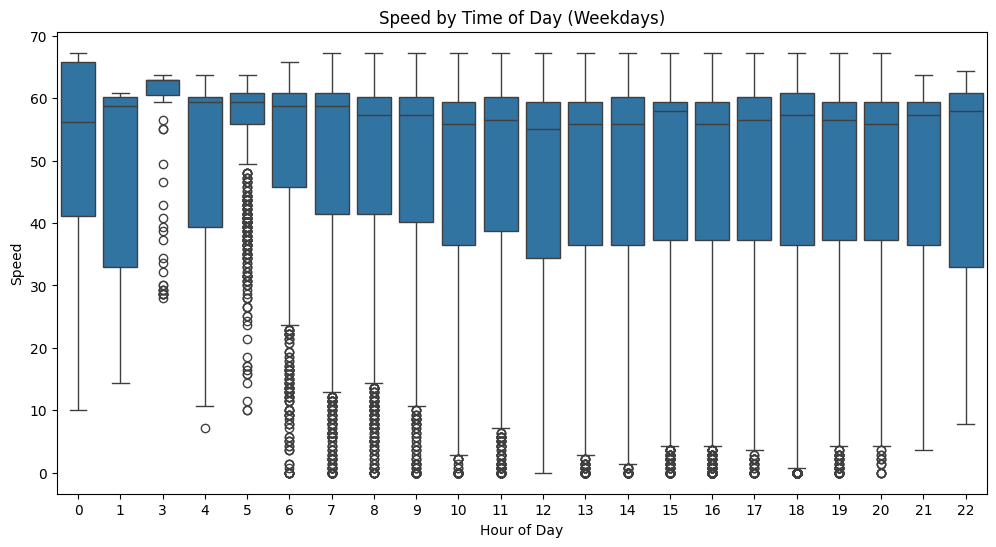

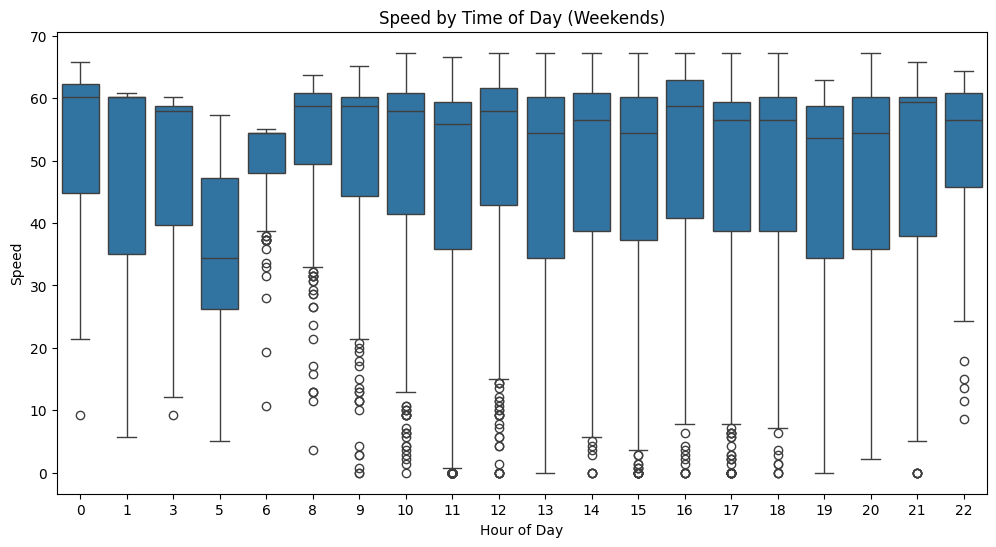

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#______________________________________________________________________________________
# Convert the PySpark DataFrame to a Pandas DataFrame
pandas_df = df.toPandas()
#_________________________________________________________________________________________
# Convert 'capturedtimestamp' to datetime in Pandas for further manipulation
pandas_df['capturedtimestamp'] = pandas_df['capturedtimestamp'].astype('datetime64[ns]')

# Extract the hour and day of the week from the timestamp
pandas_df['hour'] = pandas_df['capturedtimestamp'].dt.hour
pandas_df['day_of_week'] = pandas_df['capturedtimestamp'].dt.day_name()

# Create a new column to classify as 'Weekday' or 'Weekend'
pandas_df['day_type'] = pandas_df['day_of_week'].apply(
    lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekday'
)
#__________________________________________________________________________________________
# Filter data for weekdays
weekdays_df = pandas_df[pandas_df['day_type'] == 'Weekday']

# Plot boxplot for Speed by Hour (Weekdays)
plt.figure(figsize=(12, 6))
sns.boxplot(data=weekdays_df, x='hour', y='speed')
plt.title('Speed by Time of Day (Weekdays)')
plt.xlabel('Hour of Day')
plt.ylabel('Speed')
plt.show()
#___________________________________________________________________________
# Filter data for weekends
weekends_df = pandas_df[pandas_df['day_type'] == 'Weekend']

# Plot boxplot for Speed by Hour (Weekends)
plt.figure(figsize=(12, 6))
sns.boxplot(data=weekends_df, x='hour', y='speed')
plt.title('Speed by Time of Day (Weekends)')
plt.xlabel('Hour of Day')
plt.ylabel('Speed')
plt.show()


Removing outliers by

* **Seaborn**: Use the `showfliers=False` parameter in `sns.boxplot()` to hide outliers.
* **Matplotlib**: Use `showfliers=False` in `plt.boxplot()` to disable outliers in the boxplot.



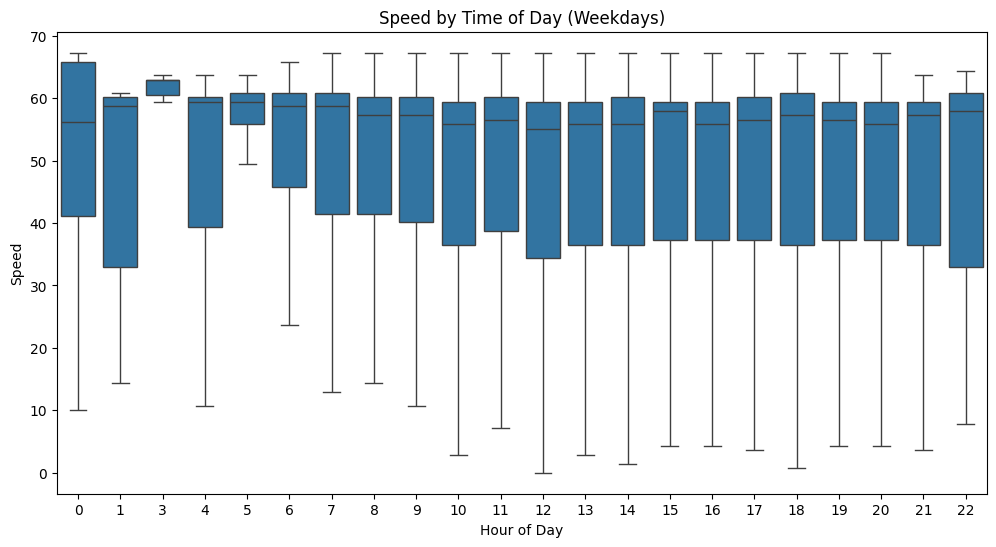

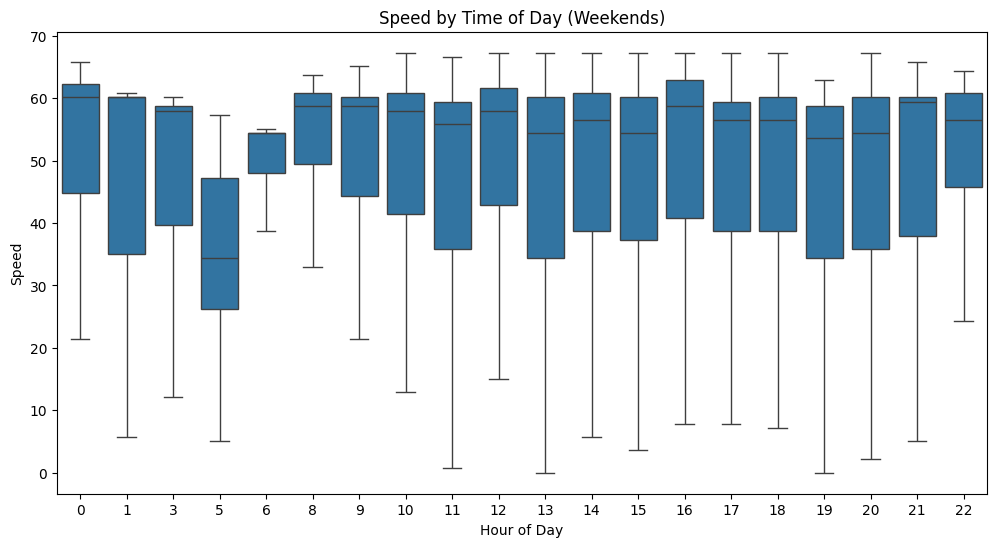

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#______________________________________________________________________________________
# Convert the PySpark DataFrame to a Pandas DataFrame
pandas_df = df.toPandas()
#_________________________________________________________________________________________
# Convert 'capturedtimestamp' to datetime in Pandas for further manipulation
pandas_df['capturedtimestamp'] = pandas_df['capturedtimestamp'].astype('datetime64[ns]')

# Extract the hour and day of the week from the timestamp
pandas_df['hour'] = pandas_df['capturedtimestamp'].dt.hour
pandas_df['day_of_week'] = pandas_df['capturedtimestamp'].dt.day_name()

# Create a new column to classify as 'Weekday' or 'Weekend'
pandas_df['day_type'] = pandas_df['day_of_week'].apply(
    lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekday'
)
#__________________________________________________________________________________________
# Filter data for weekdays
weekdays_df = pandas_df[pandas_df['day_type'] == 'Weekday']

# Plot Seaborn boxplot for Speed by Hour (Weekdays) with outliers hidden
plt.figure(figsize=(12, 6))
sns.boxplot(data=weekdays_df, x='hour', y='speed', showfliers=False)
plt.title('Speed by Time of Day (Weekdays)')
plt.xlabel('Hour of Day')
plt.ylabel('Speed')
plt.show()
#___________________________________________________________________________
# Filter data for weekends
weekends_df = pandas_df[pandas_df['day_type'] == 'Weekend']

# Plot Seaborn boxplot for Speed by Hour (Weekends) with outliers hidden
plt.figure(figsize=(12, 6))
sns.boxplot(data=weekends_df, x='hour', y='speed', showfliers=False)
plt.title('Speed by Time of Day (Weekends)')
plt.xlabel('Hour of Day')
plt.ylabel('Speed')
plt.show()
